# Linear Regression

m = number of training samples(number of rows)
X = input features(matrix)
y = output target(matrix)


                training-set
                    |
                    V
                Learning algorithm
                    |
                    V
        test --->   h  ---> estimation
        
        
`h(x) = theta0 + theta1 * X`

Affine Function = linear function + a constant

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = load_boston()

In [3]:
df = pd.DataFrame(data=dataset['data'],columns=dataset.feature_names)
df['target'] = dataset["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- randomly one feature to explore linear regression

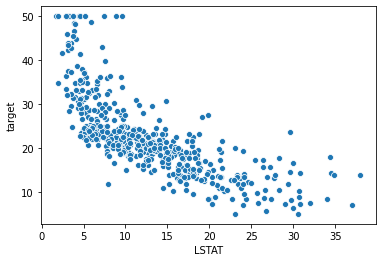

In [4]:
sns.scatterplot(df["LSTAT"],df["target"])
plt.show()

## Building linear regression model

### Using Gradient Descent

In [5]:
X_initial = df["LSTAT"].values.reshape(-1,1)
y = df["target"].values.reshape(-1,1)

X_initial.shape, y.shape

((506, 1), (506, 1))

In [6]:
X = np.hstack((np.ones_like(X_initial),X_initial))

X.shape

(506, 2)

![linear_reg1](./images/linear_reg1.png)

### Gradient Descent Alogrithm

![linear_reg4](./images/linear_reg4.png)

### Gradient Descent intuition
![linear_reg2](./images/linear_reg2.png)

![linear_reg5](./images/linear_reg5.png)

In [7]:
def regression_cost_func(y_pred,y):
    return np.sum(np.square(y_pred - y)) / ( 2 * y_pred.shape[0])

def mse_calculation(y_pred,y):
    m = y.shape[0]
    mean_squared_error = np.sum(np.square(y_pred - y)) * (1/m)
    return mean_squared_error,mean_squared_error ** (1/2)

def train(X,y,iterations=10000,alpha=0.001):
    n = X.shape[1]
    m = X.shape[0]
    theta = np.random.rand(1,n)
    cost_history = []
    theta_history = []
    
    for iteration in range(iterations):
        
        y_pred = X @ theta.T
        new_theta = np.zeros_like(theta)
        for i in range(n):
            new_theta[0][i] = theta[0][i] - alpha * np.sum( ( y_pred - y ) * X[:,i].reshape(-1,1) ) * (1 / m)
        
        theta = new_theta
        cost = new_cost = regression_cost_func( X@theta.T,y )
        cost_history.append(cost)
        theta_history.append(theta[0])
    mse,rmse = mse_calculation(X@theta.T,y )
    return theta,np.array(cost_history).reshape(-1,1),np.array(theta_history),mse,rmse


In [8]:
theta,cost_history,theta_history,mse,rmse = train(X,y,iterations=10000,alpha=0.003)

![linear_reg3](./images/linear_reg3.png)

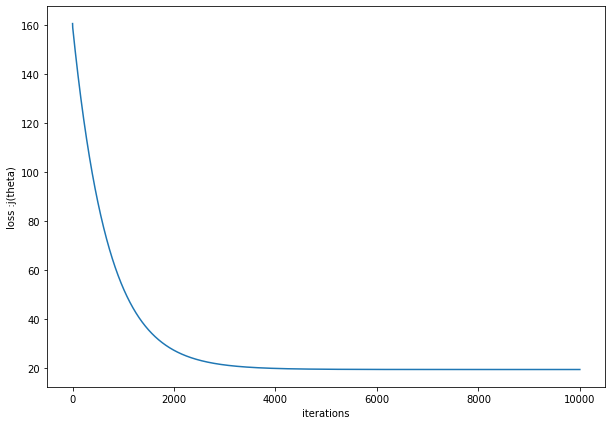

In [9]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(theta)"
)

ax.plot(cost_history)
plt.show()

In [10]:
theta,mse,rmse

(array([[34.52867418, -0.94853842]]), 38.48312000427522, 6.203476445048794)

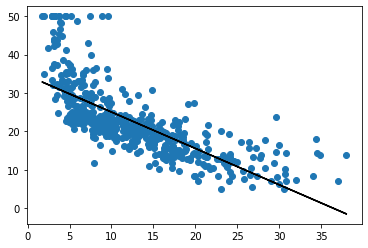

In [11]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_initial,y)
ax.plot(X_initial,X @ theta.T,c='black')
plt.show()

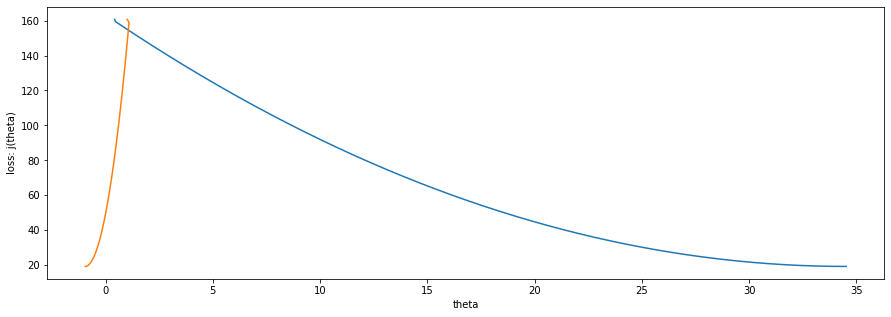

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
ax.set(
    ylabel="loss: j(theta)",
    xlabel="theta"
)
ax.plot(theta_history,cost_history)
plt.show()

### Using Normal Equation

```math
theta = (X^T * X)^-1 * X^T * y
```

In [13]:
X_initial = df["LSTAT"].values.reshape(-1,1)
y = df["target"].values.reshape(-1,1)

X_initial.shape, y.shape

((506, 1), (506, 1))

In [14]:
X = np.hstack((np.ones_like(X_initial),X_initial))

X.shape

(506, 2)

In [15]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y

theta.shape

(2, 1)

In [16]:
y_pred = X @ theta

y_pred.shape

(506, 1)

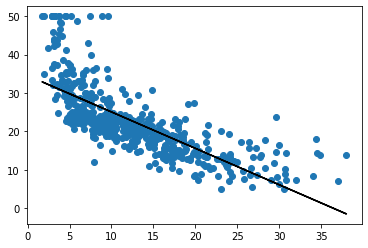

In [17]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_initial,y)
ax.plot(X_initial,y_pred,c='black')
plt.show()

### Using Scikit-Learn Library

In [18]:

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [19]:
linear_reg_init = LinearRegression(normalize=True)
print(linear_reg_init.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
        an estimator with ``normalize=False``.

    copy_X : bool, default=True
        If True, X will be copied

In [20]:
feature_matrix = df['LSTAT'].values.reshape(-1,1)
feature_matrix.shape

(506, 1)

In [21]:
target_matrix = df["target"].values.reshape(-1,1)
target_matrix.shape

(506, 1)

In [22]:
linear_reg_model = linear_reg_init.fit(feature_matrix,target_matrix)

## Visualizing fit line

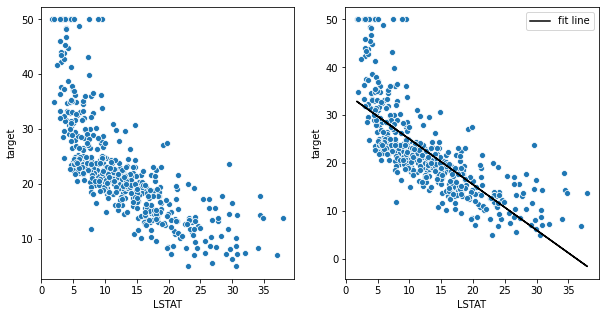

In [23]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(df["LSTAT"],df["target"],ax=ax[0])

sns.scatterplot(df["LSTAT"],df["target"],ax=ax[1])
ax[1].plot(df["LSTAT"],linear_reg_model.predict(feature_matrix),c='black',label="fit line")
ax[1].legend()

plt.show()

## Trying with two features

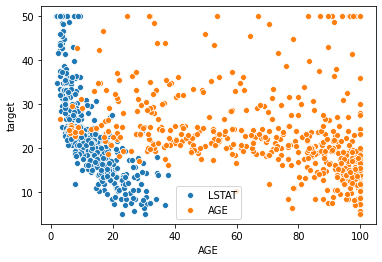

In [24]:
sns.scatterplot(df["LSTAT"],df["target"],label="LSTAT")
sns.scatterplot(df["AGE"],df["target"],label="AGE")
plt.legend()
plt.show()

/home/nishant/.local/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/nishant/.local/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/home/nishant/.local/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:842: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


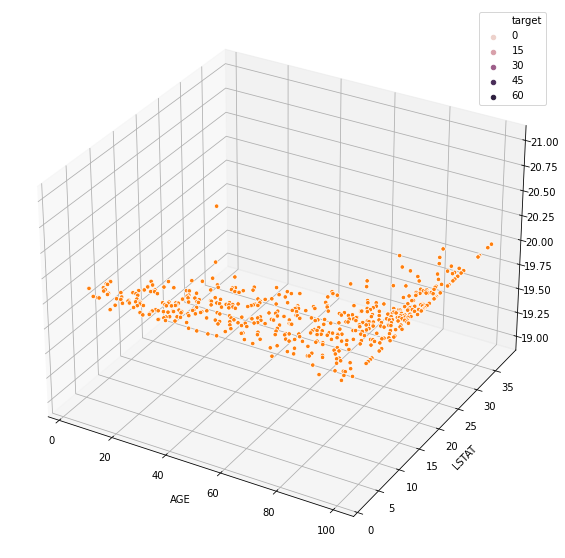

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
sns.scatterplot(df["AGE"],df["LSTAT"],df["target"])
plt.show()

In [26]:
feature_matrix = df[['LSTAT','AGE']].values
feature_matrix.shape

(506, 2)

In [27]:
df["target"].values.shape

(506,)

In [28]:
linear_reg_model = LinearRegression().fit(df[['LSTAT','AGE']],target_matrix)

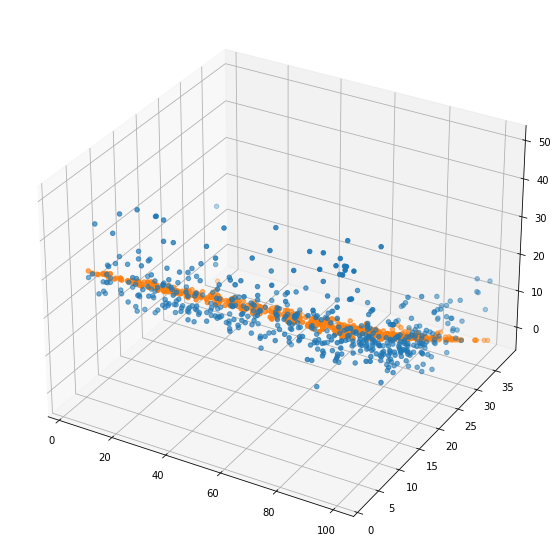

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(df["AGE"],df["LSTAT"],df["target"],marker="o")
ax.scatter(df["AGE"],df["LSTAT"],linear_reg_model.predict(df[['LSTAT','AGE']]))
plt.show()


# Ridge(L2 Regularization) and Lasso(L1 Regularization) Regression

In [30]:
from sklearn.linear_model import Ridge,Lasso

In [31]:
print(Lasso.__doc__)

Linear Model trained with L1 prior as regularizer (aka the Lasso)

    The optimization objective for Lasso is::

        (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

    Technically the Lasso model is optimizing the same objective function as
    the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

    Read more in the :ref:`User Guide <lasso>`.

    Parameters
    ----------
    alpha : float, default=1.0
        Constant that multiplies the L1 term. Defaults to 1.0.
        ``alpha = 0`` is equivalent to an ordinary least square, solved
        by the :class:`LinearRegression` object. For numerical
        reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
        Given this, you should use the :class:`LinearRegression` object.

    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    norm

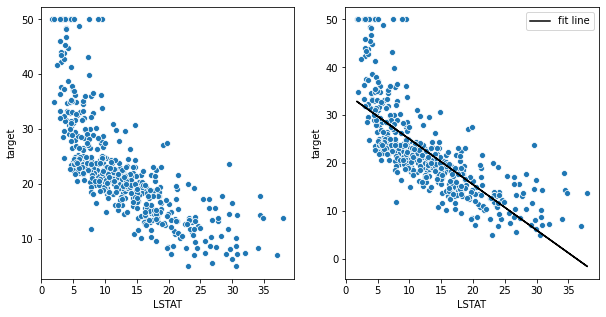

In [32]:
feature_matrix = df['LSTAT'].values.reshape(-1,1)
target_matrix = df["target"].values.reshape(-1,1)
ridge_reg_model = Ridge(alpha=1.0).fit(feature_matrix,target_matrix)

fig,ax = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(df["LSTAT"],df["target"],ax=ax[0])

sns.scatterplot(df["LSTAT"],df["target"],ax=ax[1])
ax[1].plot(df["LSTAT"],ridge_reg_model.predict(feature_matrix),c='black',label="fit line")
ax[1].legend() 

plt.show()

In [33]:
print(Ridge.__doc__)

Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

    Read more in the :ref:`User Guide <ridge_regression>`.

    Parameters
    ----------
    alpha : {float, ndarray of shape (n_targets,)}, default=1.0
        Regularization strength; must be a positive float. Regularization
        improves the conditioning of the problem and reduces the variance of
        the estimates. Larger values specify stronger regularization.
        Alpha corresponds to ``1 / (2C)`` in other linear models such as
        :class:`~sklearn.linear_model.LogisticRegression` or
        :class:`

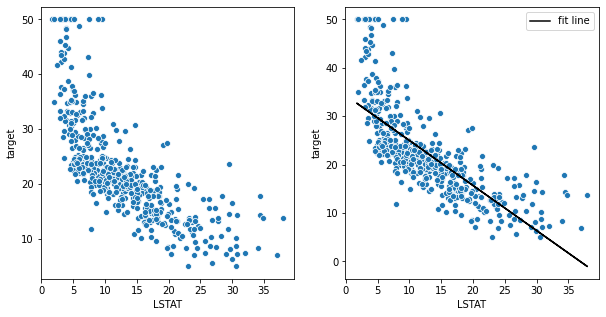

In [34]:
feature_matrix = df['LSTAT'].values.reshape(-1,1)
target_matrix = df["target"].values.reshape(-1,1)
lasso_reg_model = Lasso(alpha=1.0).fit(feature_matrix,target_matrix)

fig,ax = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(df["LSTAT"],df["target"],ax=ax[0])

sns.scatterplot(df["LSTAT"],df["target"],ax=ax[1])
ax[1].plot(df["LSTAT"],lasso_reg_model.predict(feature_matrix),c='black',label="fit line")
ax[1].legend()

plt.show()